## 1 Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

### Load the dataset and display a sample of five rows of the data frame.

In [2]:
df = pd.read_csv('renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features 

In [3]:
df.shape

(192544, 16)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

- We have 192544 intances and 16 columns in the dataset.
- There are some missing values in the dataset.
- We have around 10 object type variables and rest all interger datatype variables.

In [5]:
df.nunique()

Unnamed: 0        192544
fit                    3
user_id           105571
bust size            106
item_id             5850
weight               190
rating                 5
rented for             9
review_text       191027
body type              7
review_summary    154736
category              68
height                24
size                  56
age                   89
review_date         2274
dtype: int64

## Data cleansing and Exploratory data analysis

### 3. Check if there are any duplicate records in the dataset? If any, drop them

In [6]:
len(df[df.duplicated()])

0

#### No duplicate values are present in the data set.

### 4. Drop the columns which you think redundant for the analysis.

In [7]:
df=df.drop(columns=['Unnamed: 0','user_id','item_id','review_text','review_summary','review_date'],axis=1)

In [8]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float.

In [9]:
df['weight']=df['weight'].str.replace('lbs','').astype(float)
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [10]:
df['weight'].dtype

dtype('float64')

### 6. Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'.

In [11]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [12]:
df['rented for']=df['rented for'].replace({'party: cocktail':'party'})
df['rented for'].value_counts()

wedding          57784
formal affair    40408
party            35627
everyday         16822
other            15388
work             15042
date              7388
vacation          4075
Name: rented for, dtype: int64

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [13]:
def Height_conversion(x):
  if x is np.NaN:
    return x
  else:
    ft,inc = x.split("'")
    inches = inc[1:-1]
    return ((12*int(ft)) + int(inches))

df['height'] = df['height'].apply(Height_conversion)

In [14]:
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [15]:
df.isnull().sum()/len(df)*100

fit            0.000000
bust size      9.561970
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

In [16]:
import random

top10_bustsize = df['bust size'].value_counts().sort_values(ascending=False).head(10).index.tolist()

def Bust_Replacement(x):
  if x is np.NaN:
    return np.random.choice(top10_bustsize)
  else:
    return x

df['bust size'] = df['bust size'].apply(Bust_Replacement)

In [17]:
top3_bodytype = df['body type'].value_counts().sort_values(ascending=False).head(3).index.tolist()

def BodyType_Replacement(x):
  if x is np.NaN:
    return np.random.choice(top3_bodytype)
  else:
    return x

df['body type'] = df['body type'].apply(BodyType_Replacement)

In [18]:
top3_rentedFor = df['rented for'].value_counts().sort_values(ascending=False).head(3).index.tolist()

def RentedFor_Replacement(x):
  if x is np.NaN:
    return np.random.choice(top3_rentedFor)
  else:
    return x

df['rented for'] = df['rented for'].apply(RentedFor_Replacement)

In [19]:
#Replacing the missing values with mean
df['age']=df['age'].fillna(df['age'].mean())
df['height']=df['height'].fillna(df['height'].mean())
df['rating']=df['rating'].fillna(df['rating'].mean())
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,32c,NaN,10.0,party,hourglass,sheath,64.0,4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0


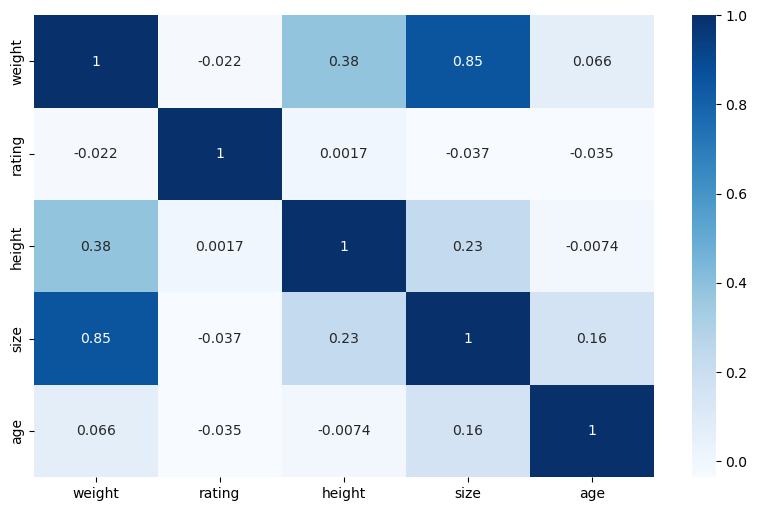

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame called 'df' with a target variable 'target' and other relevant features

# Step 1: Split the dataset into two parts based on missingness of the target variable
df_missing = df[df['weight'].isnull()]  # Dataset with missing values
df_non_missing = df[~df['weight'].isnull()]  # Dataset without missing values

# Step 2: Identify relevant features for predicting missing values
features = ['height', 'size', 'age']  # Add relevant feature names

# Step 3: Build a predictive model using the dataset without missing values
X_train, X_test, y_train, y_test = train_test_split(df_non_missing[features], df_non_missing['weight'], test_size=0.3)
model = LinearRegression()  # Choose an appropriate model
model.fit(X_train, y_train)

# Step 4: Use the trained model to predict missing values
missing_predictions = model.predict(df_missing[features])

# Step 5: Replace missing values with the predicted values in the original dataset
df.loc[df['weight'].isnull(), 'weight'] = missing_predictions

# Print the updated DataFrame
print(df)

        fit bust size      weight  rating     rented for          body type  \
0       fit       34d  137.000000    10.0       vacation          hourglass   
1       fit       34b  132.000000    10.0          other  straight & narrow   
2       fit       32c  102.100162    10.0          party          hourglass   
3       fit       34c  135.000000     8.0  formal affair               pear   
4       fit       34b  145.000000    10.0        wedding           athletic   
...     ...       ...         ...     ...            ...                ...   
192539  fit      34dd  140.000000    10.0           work          hourglass   
192540  fit       32c  100.000000    10.0           work             petite   
192541  fit       36a  135.000000     6.0       everyday  straight & narrow   
192542  fit       36c  165.000000    10.0        wedding               pear   
192543  fit       36b  155.000000    10.0        wedding           athletic   

        category  height  size    age  
0         r

In [22]:
df.isnull().sum()/len(df)*100

fit           0.0
bust size     0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [23]:
df.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,139.137591,9.092371,65.310621,12.245175,33.871017
std,22.541153,1.429740,2.658793,8.494877,8.037969
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,125.000000,8.000000,63.000000,8.000000,29.000000
50%,135.000000,10.000000,65.000000,12.000000,32.000000
75%,150.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


In [24]:
df.describe(include='O')

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,29128,57786,60144,92884


### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

<AxesSubplot:xlabel='age'>

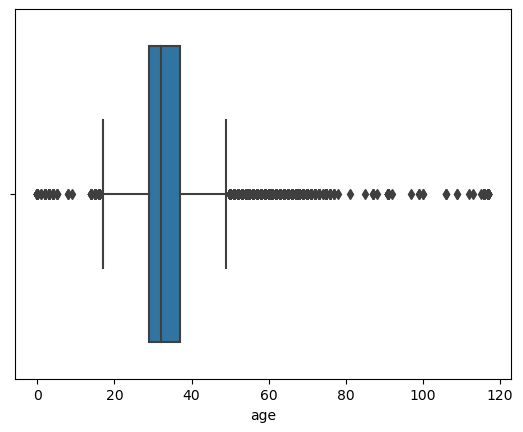

In [25]:
sns.boxplot(df['age'])

In [26]:
#Removing outliers by using drop
df.drop(df[(df['age'] < 19) | (df['age'] > 46)].index, inplace=True)

<AxesSubplot:xlabel='age'>

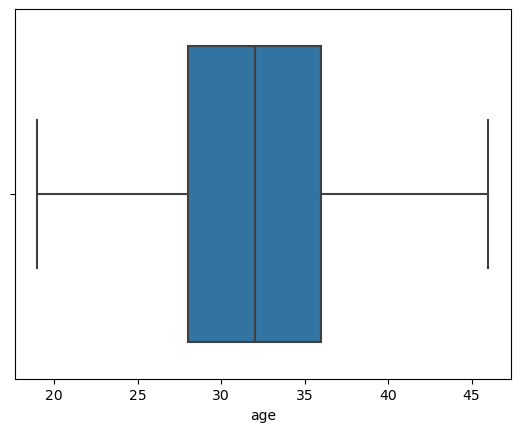

In [27]:
sns.boxplot(df['age'])

In [28]:
df.shape

(176167, 10)

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

<AxesSubplot:xlabel='rented for', ylabel='count'>

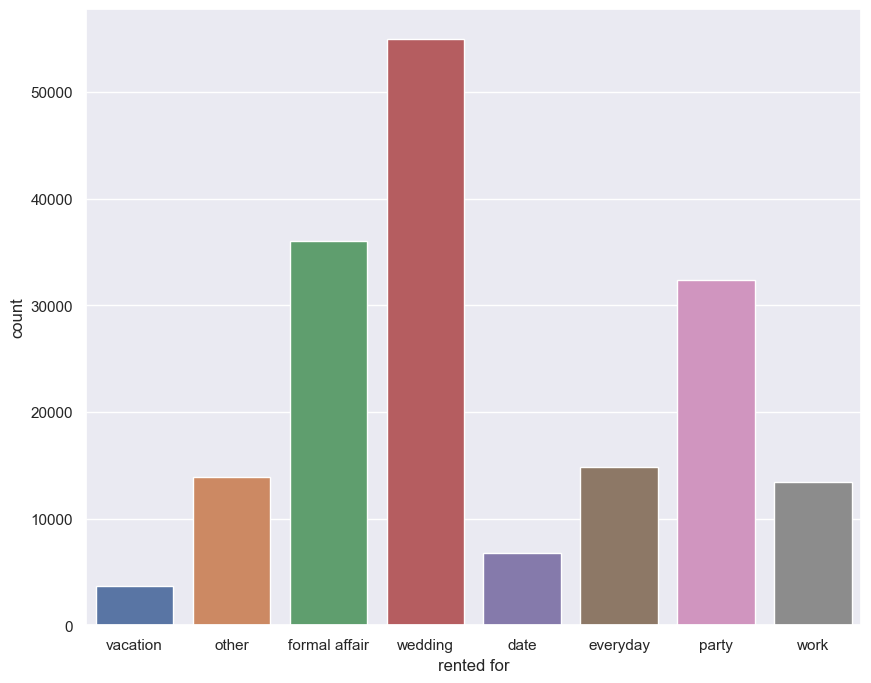

In [29]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot( x ='rented for',data=df)

#The countplot shows number of people who have rented clothing for each of the categories(8 categories)
#Maximum number of people have rented for wedding,few people have rented for vacation

## Data Preparation for model building:

### 12. Encode the categorical variables in the dataset.

In [30]:
df_cat=df[['fit','bust size','rented for','body type','category','height']]
    
le = LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])

### 13. Standardize the data, so that the values are within a particular range.

In [31]:
#Standardize the data, so that the values are within a particular range using standard scaler
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
df.iloc[:,:] = ss.fit_transform(df.iloc[:,:])
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556808,0.019339,-0.088491,0.636173,0.496339,0.030840,1.583724,1.043915,0.239601,-0.773552
1,-0.556808,-0.157995,-0.310980,0.636173,-0.475832,1.892290,-0.304404,0.396179,0.001013,0.689518
3,-0.556808,-0.069328,-0.177487,-0.768243,-0.961918,0.651323,-0.619093,-0.251558,-0.476163,0.323750
4,-0.556808,-0.157995,0.267491,0.636173,0.982425,-1.210127,-0.304404,1.367783,0.001013,-0.956436
5,-0.556808,-1.310662,-0.043994,-0.768243,-1.934090,-1.210127,-0.619093,1.043915,-0.476163,2.335472


## Principal Component Analysis and Clustering:

 ### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [32]:
## Calculating covariance matrix
cov_matrix = np.cov(df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00000568e+00  8.09414983e-03  2.00350202e-02 -2.43613859e-01
   6.84330287e-03 -7.92536869e-03  5.64979921e-05  2.80585844e-04
   6.57624333e-02 -3.24783624e-03]
 [ 8.09414983e-03  1.00000568e+00  6.07648486e-01 -1.90967488e-02
   1.30315217e-03 -2.03969732e-01 -1.27328165e-02  1.41465553e-01
   6.05052700e-01  1.33850097e-01]
 [ 2.00350202e-02  6.07648486e-01  1.00000568e+00 -2.52340809e-02
   7.80037035e-03 -2.41853729e-01 -1.77253256e-02  3.78320494e-01
   8.83069220e-01  6.73059196e-02]
 [-2.43613859e-01 -1.90967488e-02 -2.52340809e-02  1.00000568e+00
   1.35406145e-02  3.36805660e-03 -2.36508699e-02  1.53127643e-03
  -3.75112074e-02 -5.07680827e-02]
 [ 6.84330287e-03  1.30315217e-03  7.80037035e-03  1.35406145e-02
   1.00000568e+00 -1.24445046e-02 -5.92071273e-02 -1.80421561e-02
   7.06165671e-03 -7.88790515e-03]
 [-7.92536869e-03 -2.03969732e-01 -2.41853729e-01  3.36805660e-03
  -1.24445046e-02  1.00000568e+00 -1.25262340e-03 -1.29869006e-01
  -2.12752471

In [33]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[-3.74837872e-02 -3.44140623e-02  5.15976976e-02 -6.84120428e-01
  -6.83441666e-01  1.68072665e-01  1.49719634e-01  9.38878427e-02
  -1.17965284e-02  4.07061570e-03]
 [-4.73594347e-01  2.37547635e-02  8.10553313e-01  2.25982768e-02
   5.26408468e-02 -3.17249637e-02 -1.71654290e-01  2.34386224e-01
  -1.63067021e-01 -5.35375325e-02]
 [-5.70735484e-01 -7.28364403e-01 -3.31093488e-01  4.17313752e-02
   2.59318668e-02  2.58807665e-02  7.36745171e-02 -2.56895027e-03
  -1.57907832e-01 -2.58883154e-02]
 [ 3.56109585e-02 -3.98071210e-03  6.88579873e-04  7.02641414e-01
  -6.99933844e-01 -2.03276778e-02 -2.29750723e-02  1.02096416e-01
  -5.92393423e-02  1.51377395e-02]
 [-4.06983522e-03  2.95712898e-03  1.51661424e-02  4.17589158e-02
   3.50709358e-02  6.53127885e-01 -3.10191030e-01 -1.71452116e-01
  -1.55137503e-01  6.48469675e-01]
 [ 2.36855535e-01 -1.55750290e-02  3.54300349e-02 -4.61040786e-02
  -1.63805309e-02 -1.75383804e-02 -6.45324661e-02 -3.45260809e-01
  -8.51010755e-0

In [34]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [26.563627067940487, 12.484837523608212, 10.65753550379708, 10.248256424381747, 9.430241348556729, 9.026397287037824, 8.587181432409837, 7.489800684203852, 4.509626383647623, 1.0024963444166357]
Cummulative Variance Explained:  [ 26.56362707  39.04846459  49.7060001   59.95425652  69.38449787
  78.41089516  86.99807659  94.48787727  98.99750366 100.        ]


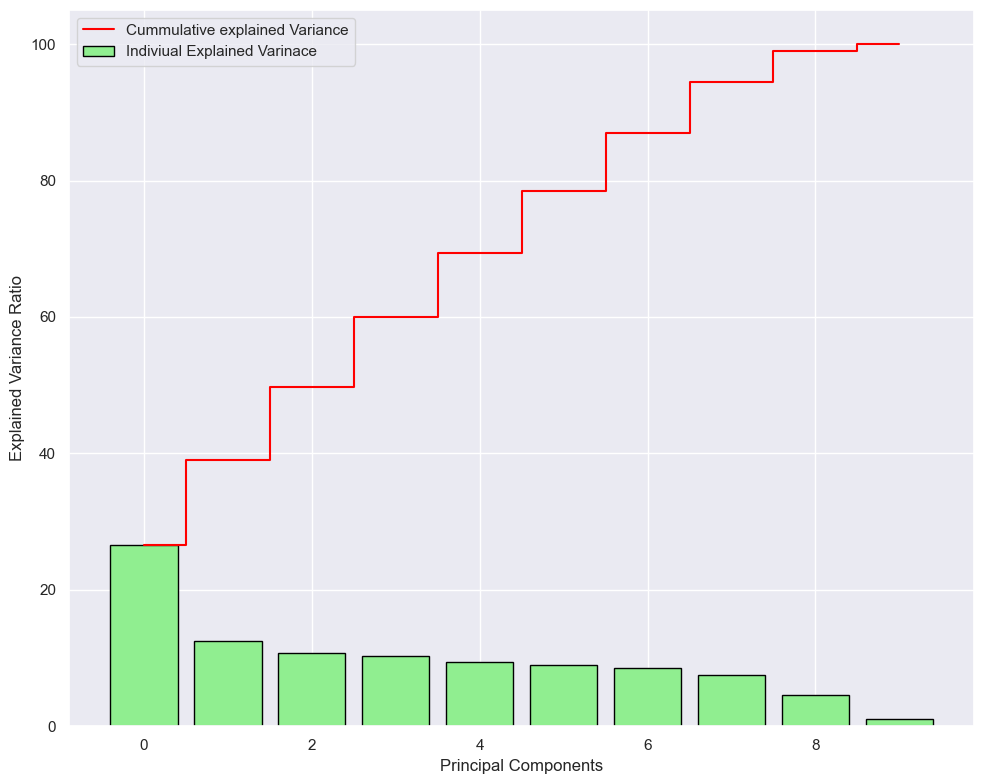

In [35]:
## Scree plot
plt.bar(range(10),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(10), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

- We can see that approximately greater than 85.0% of variance is explained by the first 7 variables.
- so, we can choose the optimal number of principal components as 7.

In [36]:
## Fitting the PCA model
pca=PCA(n_components = 7)
pca.fit(df)

PCA(n_components=7)

In [37]:
data_pca = pca.transform(df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.218290,-0.886824,0.589499,1.002513,1.511822,0.538392,-0.513083
1,-0.561452,-0.685327,0.440595,-0.440778,-1.125574,1.173504,-1.193366
2,-0.574815,0.237502,0.409022,-0.228679,-1.273007,0.036810,-0.206111
3,0.589230,-1.204400,-1.099810,1.087544,0.949713,-0.917025,-0.414749
4,-0.086038,0.338504,1.524714,-0.504475,-1.439569,-2.632288,-1.535570


### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

#### a. Find the optimal K Value using elbow plot for K Means clustering.

In [38]:
# Using 10% of total data as sample to calcute the results and reduce the omputation time.

df_scaled=data_pca.sample(20000)
cluster_range = range(2,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,2,141862.889151
1,3,128129.233581
2,4,116279.156667
3,5,106716.756548
4,6,100961.863992
5,7,96392.610212
6,8,92348.862659
7,9,89017.616087
8,10,86052.054820
9,11,83583.613664


#### b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

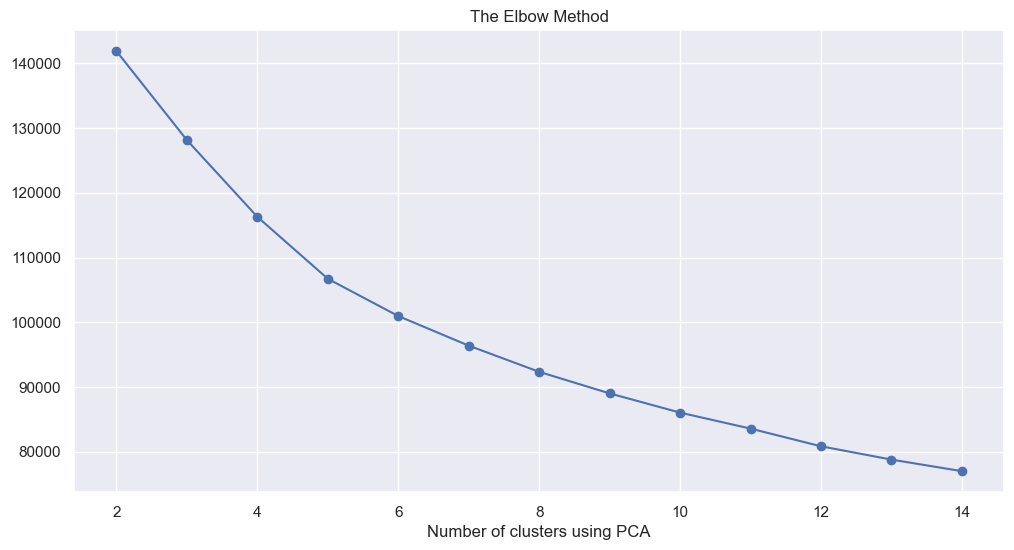

In [39]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the Elbow plot, we can see that at K=5 the interia starts to drop significantly. So we will do it using 4 clusters. 
- The clusters are labeled as 0,1,2,3.

In [40]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=5, n_init=15, random_state=2345)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, n_init=15, random_state=2345)

In [41]:
## obtained labels from kmeans clustering
kmeans.labels_

array([3, 1, 4, ..., 3, 1, 4])

In [42]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,3
1,1
2,4
3,1
4,0


In [43]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [44]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_kmeans = df.join(df_labels)

df_kmeans.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,-0.556808,0.019339,-0.088491,0.636173,0.496339,0.030840,1.583724,1.043915,0.239601,-0.773552,3
1,-0.556808,-0.157995,-0.310980,0.636173,-0.475832,1.892290,-0.304404,0.396179,0.001013,0.689518,1
3,-0.556808,-0.069328,-0.177487,-0.768243,-0.961918,0.651323,-0.619093,-0.251558,-0.476163,0.323750,1
4,-0.556808,-0.157995,0.267491,0.636173,0.982425,-1.210127,-0.304404,1.367783,0.001013,-0.956436,0
5,-0.556808,-1.310662,-0.043994,-0.768243,-1.934090,-1.210127,-0.619093,1.043915,-0.476163,2.335472,1


In [45]:
df_kmeans['Labels'].value_counts()

1    5959
2    4104
0    2890
3    2761
4    2643
Name: Labels, dtype: int64

#### c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [46]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df_scaled)
    labels = kmeans.predict(df_scaled)
    print(i,silhouette_score(df_scaled,labels))

2 0.18779403317013896
3 0.16667057795207732
4 0.1411719924632732
5 0.1484317051674562
6 0.13365132757283613
7 0.13153784586699974
8 0.1259590989649113
9 0.1283755305535955


### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data)

#### a. Find the optimal K Value using dendrogram for Agglomerative clustering.

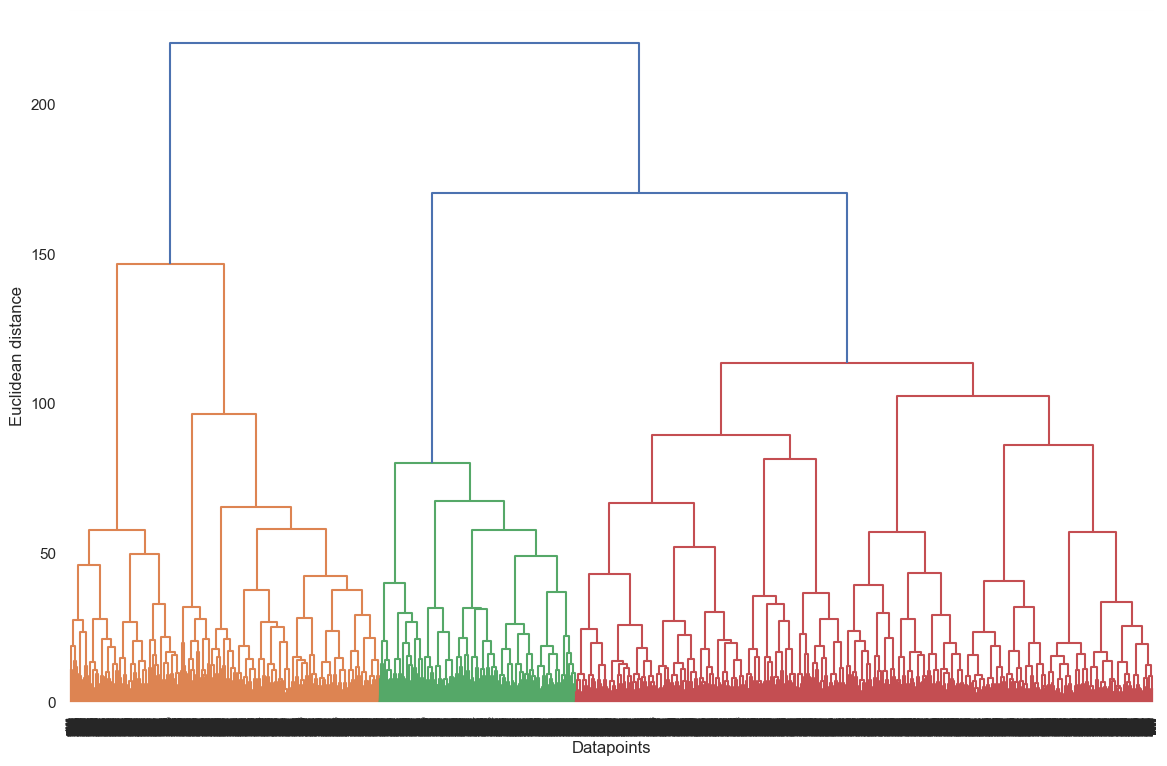

In [47]:
#ss = StandardScaler()
#df_agg_scaled=df_scaled.sample(10000)
#df_agg_scaled.iloc[:,:] = ss.fit_transform(df_agg_scaled.iloc[:,:])

plt.figure(figsize=[14,9])
merg = linkage(df_scaled, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

#### b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram

In [48]:
hie_cluster = AgglomerativeClustering(n_clusters=5 , affinity='euclidean',
                                     linkage='ward')

hie_cluster_model = hie_cluster.fit(df_scaled)

In [49]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(n=10)

,Labels
0,3
1,4
2,2
3,4
4,1
5,4
6,1
7,2
8,1
9,2


In [50]:
## joining the label dataframe with unscaled initial dataframe.(df)
df_hier = df.join(df_label1)

#### c. Compute silhoutte score for evaluating the quality of the Agglomerative clustering technique

In [51]:
from sklearn.metrics import silhouette_score
for i in range(2,10):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df_scaled)
    labels = hier.fit_predict(df_scaled)
    print(i,silhouette_score(df_scaled,labels))

2 0.15412737551641903
3 0.1384269732296802
4 0.13667227606786056
5 0.0903903295109591
6 0.07864955352351559
7 0.07591793686109934
8 0.07291155524796272
9 0.053959805046736586


## Conclusion :
### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

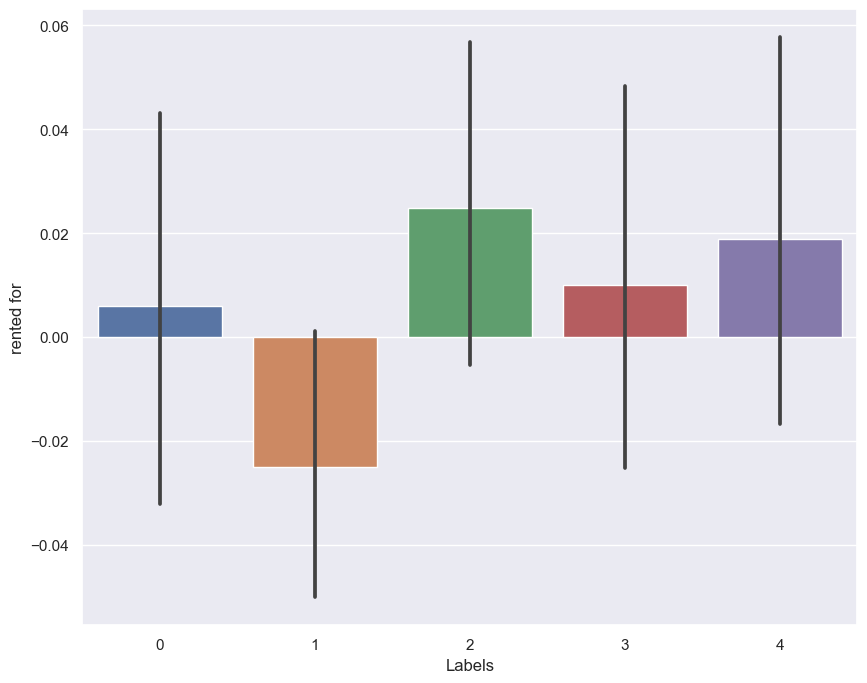

In [52]:
sns.barplot(df_kmeans['Labels'],df_kmeans['rented for'])
plt.show()
#the below bar plot shows what peple have rented cloth for different purposes

<AxesSubplot:xlabel='Labels', ylabel='category'>

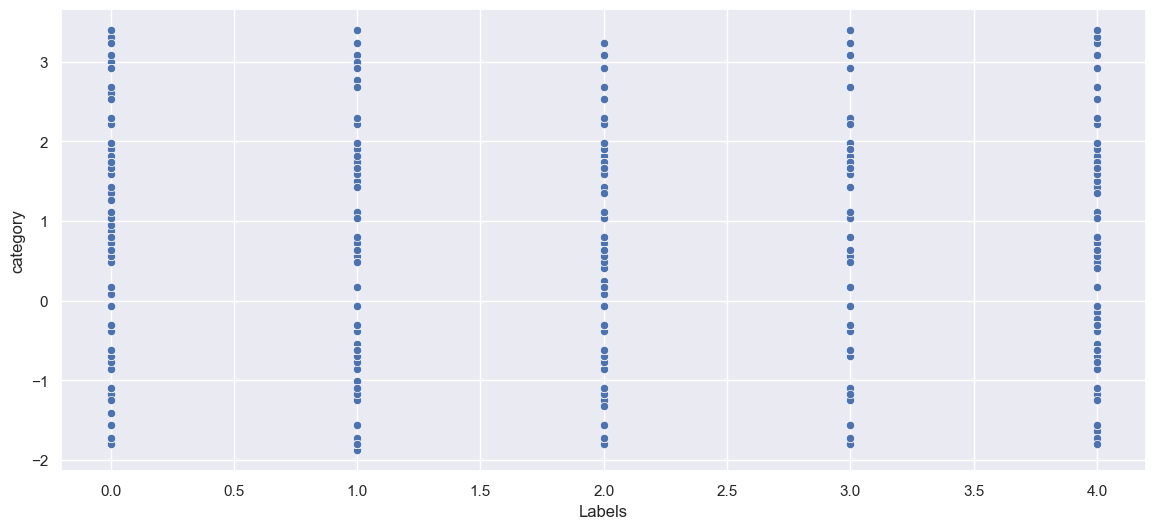

In [53]:
#This scatter plot shows differnt categories of products
sns.set(rc={"figure.figsize":(14, 6)})
sns.scatterplot(df_hier['Labels'],df_hier['category'])

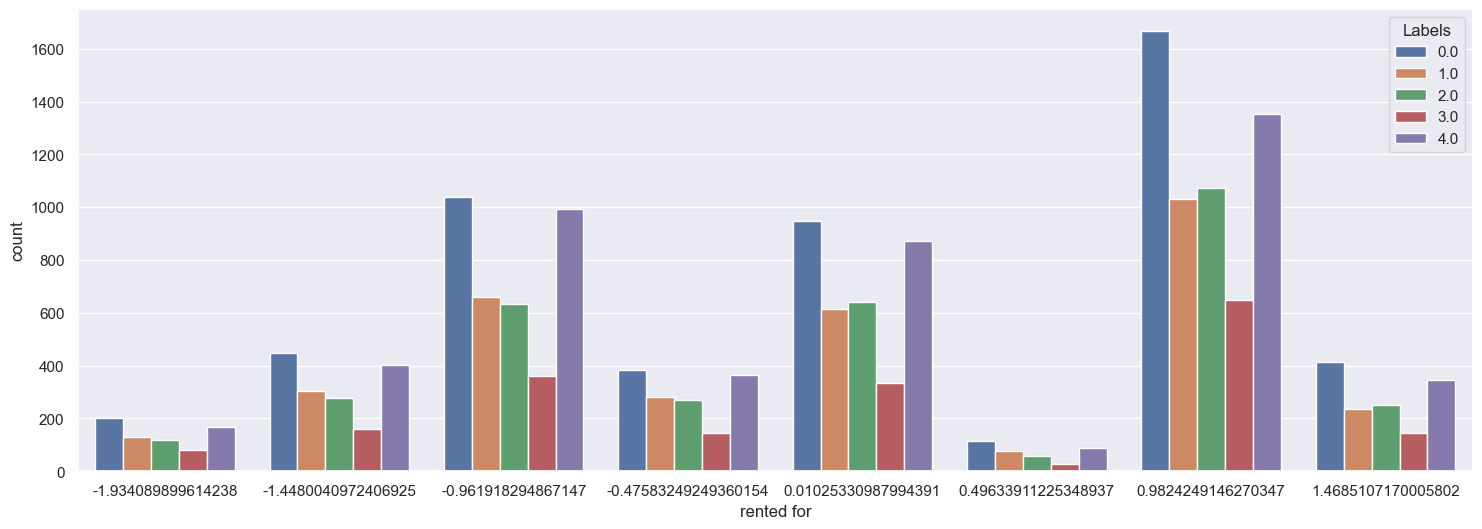

In [54]:
#the below bar plot shows what peple have rented cloths for different purposes
sns.set(rc={"figure.figsize":(18, 6)})
sns.countplot(data = df_hier, x = 'rented for', hue = 'Labels')
plt.show()

In [ ]:
# We built Kmeans clustering and Agglomerative clustering models
#*KMeans* - for chosing the optimal k value we used elbow method (we chose K=5)
#*Agglomerative* - for chosing the optimal k value we used dendogram (we chose k=5)
# To conculde which clustering technique is performing the best, we evaluated through silhouette score
#For Kmeans the highest silhouette score value is 0.18 for 2 clusters
#For Agglomerative the highest silhouette score value is 0.15 for 2 clusters
#So, we can choose the KMeans clustering model as our best and final model and optimal number of clusters as 2
# Most of the people have rented clothes for party,formal atire and wedding,therefore the company has to focus more on 
#these factors to achieve growth in their business